In [123]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [124]:
df = pd.read_csv('/content/StudentsPerformance(in).csv')

In [125]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [126]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [127]:
df.shape

(1000, 8)

In [128]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [129]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [130]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [132]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [133]:
df.describe(exclude="number")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


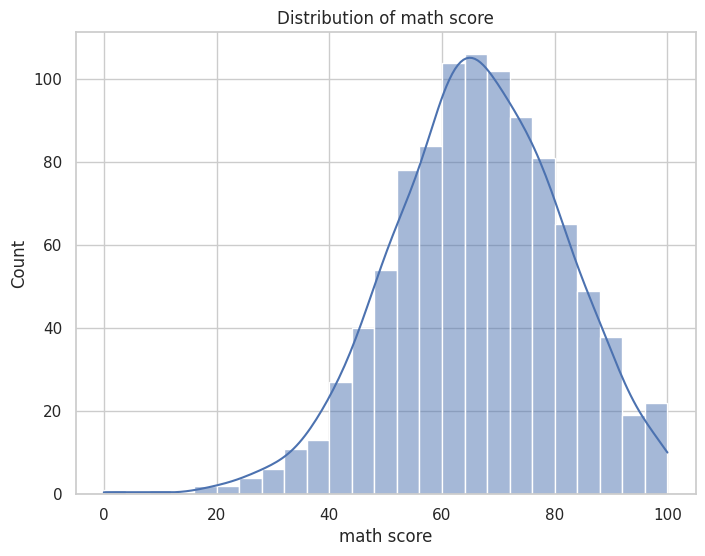

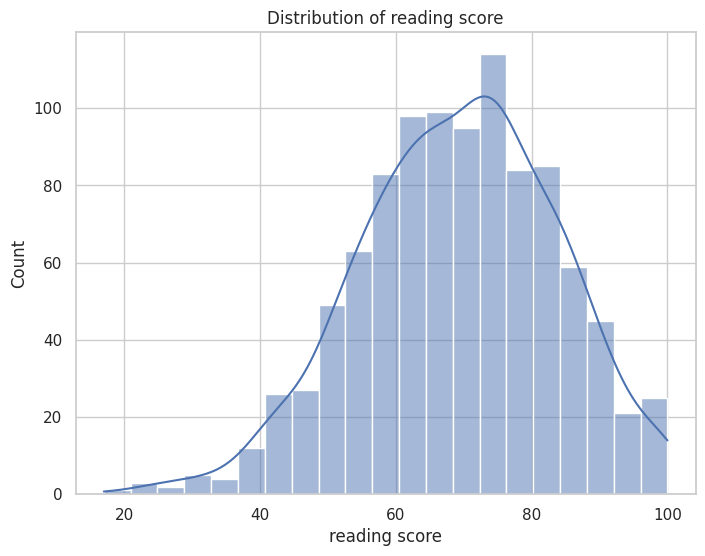

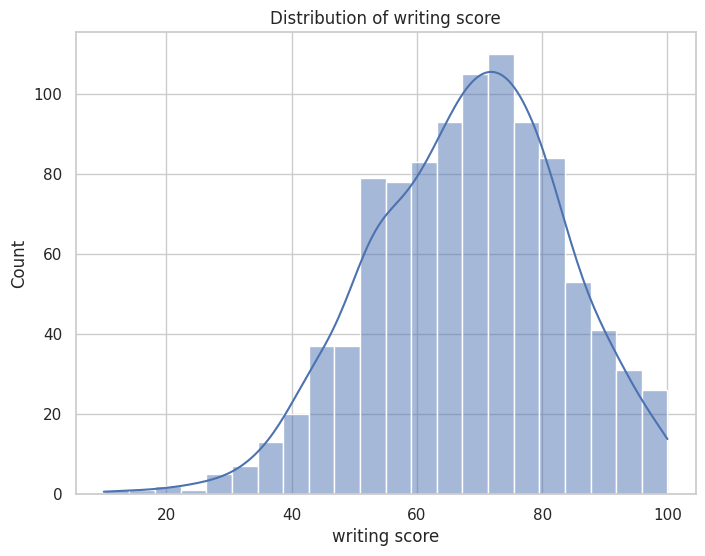

In [134]:
numerical_cols = ['math score', 'reading score', 'writing score']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

    plt.show()

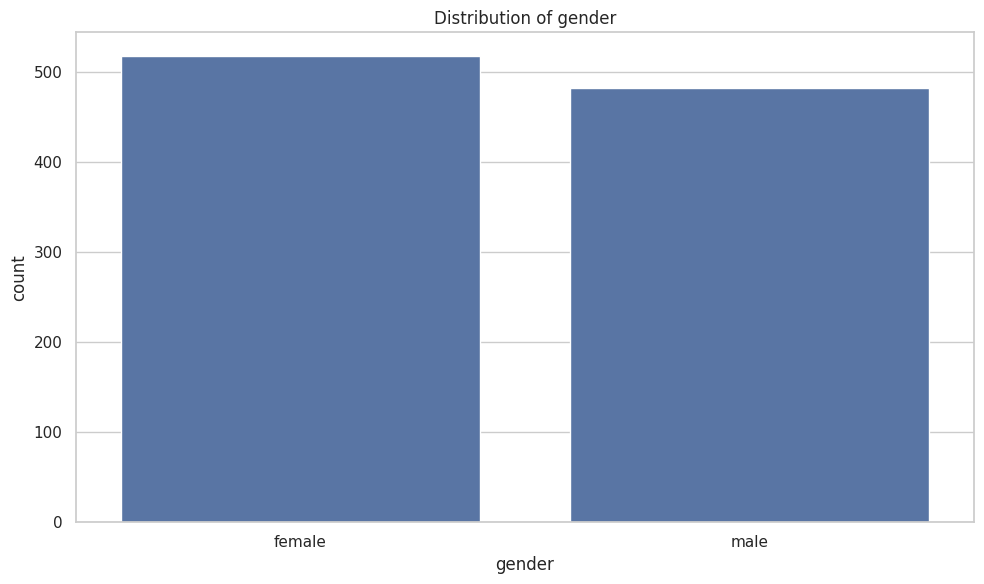

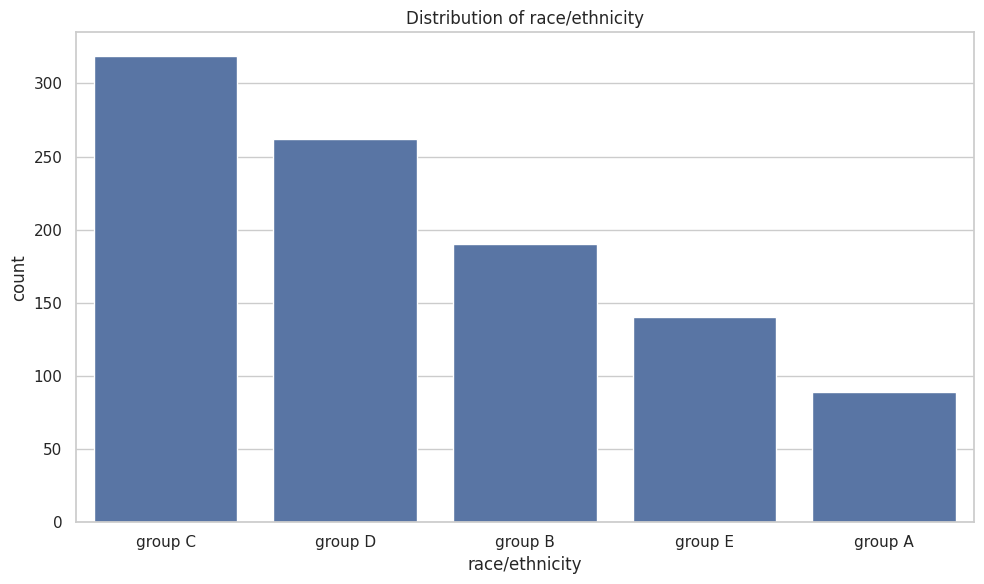

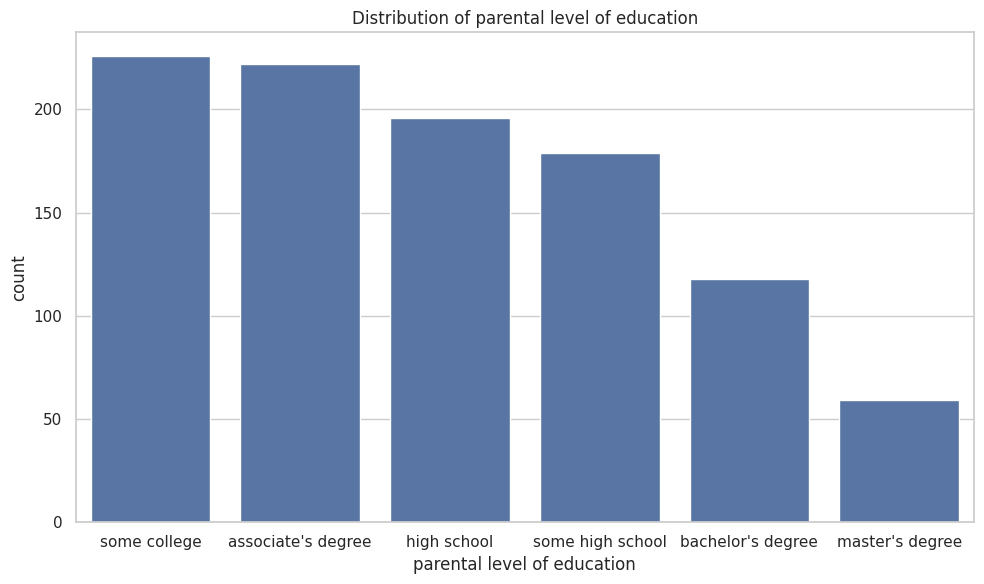

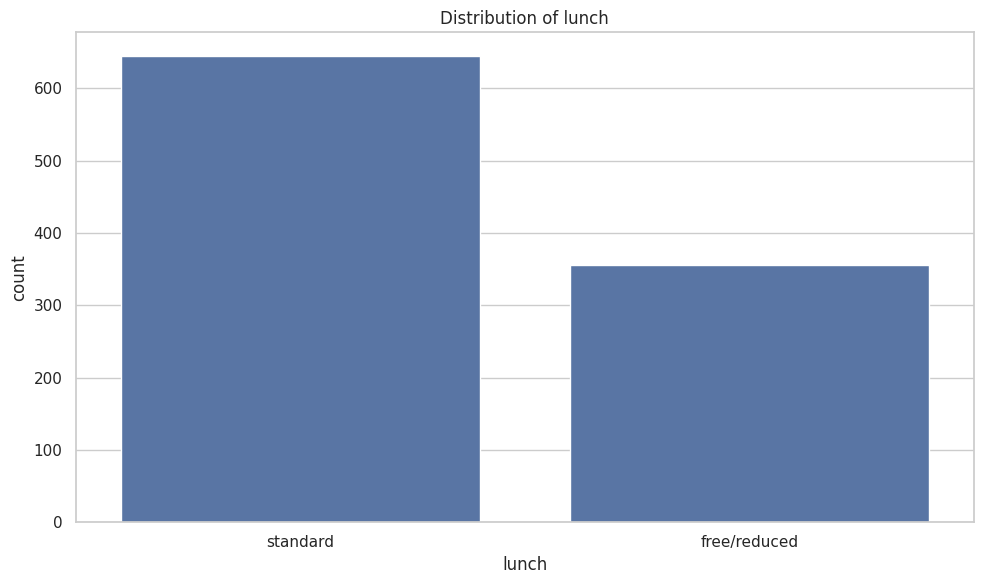

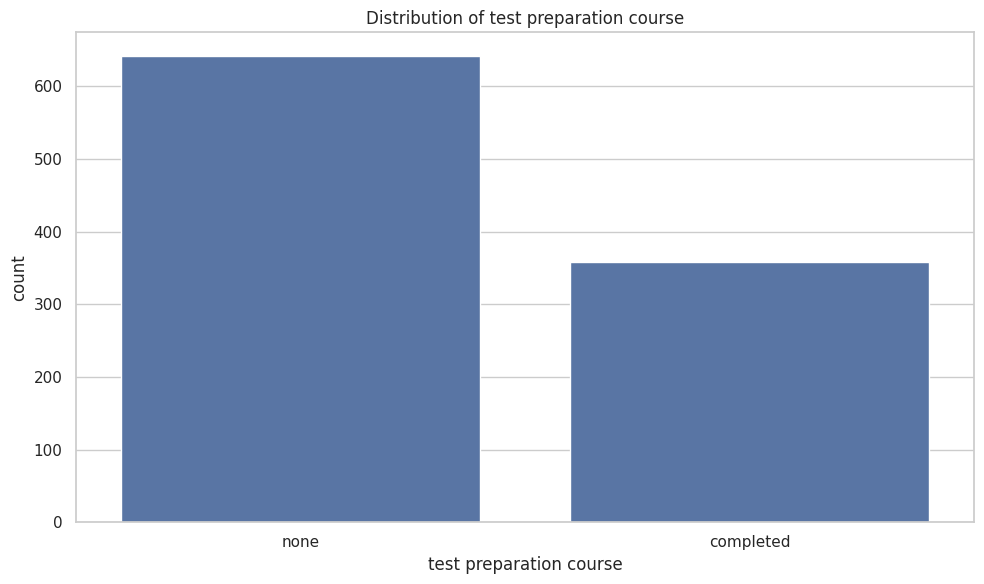

In [135]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

In [136]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})

In [137]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [138]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['result'] = df['average_score'].apply(lambda x: 1 if x >= 65 else 0)


In [139]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,result
0,0,group B,bachelor's degree,1,0,72,72,74,72.666667,1
1,0,group C,some college,1,1,69,90,88,82.333333,1
2,0,group B,master's degree,1,0,90,95,93,92.666667,1
3,1,group A,associate's degree,0,0,47,57,44,49.333333,0
4,1,group C,some college,1,0,76,78,75,76.333333,1


In [140]:
df.drop('average_score', axis=1, inplace=True)


In [141]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,0,group B,bachelor's degree,1,0,72,72,74,1
1,0,group C,some college,1,1,69,90,88,1
2,0,group B,master's degree,1,0,90,95,93,1
3,1,group A,associate's degree,0,0,47,57,44,0
4,1,group C,some college,1,0,76,78,75,1


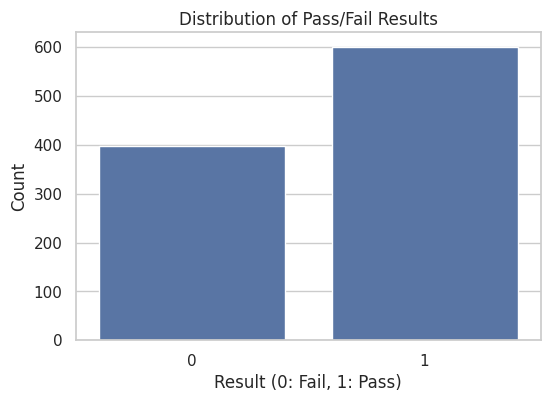

In [142]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='result')
plt.title('Distribution of Pass/Fail Results')
plt.xlabel('Result (0: Fail, 1: Pass)')
plt.ylabel('Count')
plt.show()

In [143]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'result'],
      dtype='object')

In [144]:
categorical_cols_to_encode = ['race/ethnicity', 'parental level of education']
encoded_cols = pd.get_dummies(df[categorical_cols_to_encode], dtype=int)

df = df.drop(categorical_cols_to_encode, axis=1)
df = pd.concat([df, encoded_cols], axis=1)

df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,result,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,72,72,74,1,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,69,90,88,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,90,95,93,1,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,47,57,44,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,0,76,78,75,1,0,0,1,0,0,0,0,0,0,1,0


In [145]:
df['result'].value_counts()

,count
result,
1,601
0,399


In [146]:
X = df.drop('result', axis=1)
y = df['result']


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 17)
Shape of X_test: (200, 17)
Shape of y_train: (800,)
Shape of y_test: (200,)
